In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout,GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model

In [0]:
#Load in the data
cifar10 = tf.keras.datasets.cifar10
(x_train,y_train) , (x_test,y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/250.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print('x_train.shape', x_train.shape)
print('y_train.shape', y_train.shape)

170500096/170498071 [==============================] - 13s 0us/step
x_train.shape (50000, 32, 32, 3)
y_train.shape (50000,)


In [0]:
x_train[0][0][0].shape

(3,)

In [0]:
x_train[0][0][0]

array([0.23137255, 0.24313725, 0.24705882])

In [0]:
#number of classes
K = len(set(y_train))
print('number of classes:', K)

number of classes: 10


In [0]:
#Build the model using the functional API
i = Input(shape=x_train[0].shape)
x = Conv2D(32,(3,3), activation='relu', padding='same') (i)
x = BatchNormalization()(x)
x = Conv2D(32,(3,3), activation='relu',padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
#x = Dropout(0.2)(x)
x = Conv2D(64,(3,3), activation='relu', padding='same') (x)
x = BatchNormalization()(x)
x = Conv2D(64,(3,3), activation='relu', padding='same') (x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
#x = Dropout(0.2)(x)
x = Conv2D(128, (3,3), activation='relu', padding='same') (x)
x= BatchNormalization()(x)
x = Conv2D(128, (3,3), activation='relu', padding='same') (x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
#x = Dropout(0.2)(x)

#x = GlobalMaxPooling2D()(x)
x = Flatten() (x)
x= Dropout(0.2)(x)
x = Dense(1024, activation ='relu')(x)
x=Dropout(0.2) (x)
x = Dense(K, activation ='softmax') (x)

model = Model(i,x)

In [0]:
#Compile and fit
#Note: make sure you are using GPU for this
model.compile(optimizer ='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [0]:
#Fit
r = model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs=50)

Epoch 1/50
1563/1563 [==============================] - 14s 9ms/step - loss: 1.2915 - accuracy: 0.5574 - val_loss: 1.0238 - val_accuracy: 0.6460
Epoch 2/50
1563/1563 [==============================] - 13s 9ms/step - loss: 0.8529 - accuracy: 0.7039 - val_loss: 1.0010 - val_accuracy: 0.6573
Epoch 3/50
1563/1563 [==============================] - 13s 9ms/step - loss: 0.7043 - accuracy: 0.7571 - val_loss: 0.7518 - val_accuracy: 0.7471
Epoch 4/50
1563/1563 [==============================] - 13s 9ms/step - loss: 0.5852 - accuracy: 0.7982 - val_loss: 0.6814 - val_accuracy: 0.7745
Epoch 5/50
1563/1563 [==============================] - 14s 9ms/step - loss: 0.4996 - accuracy: 0.8281 - val_loss: 0.6412 - val_accuracy: 0.7884
Epoch 6/50
1563/1563 [==============================] - 13s 9ms/step - loss: 0.4283 - accuracy: 0.8543 - val_loss: 0.6232 - val_accuracy: 0.7930
Epoch 7/50
1563/1563 [==============================] - 14s 9ms/step - loss: 0.3585 - accuracy: 0.8753 - val_loss: 0.6262 - val_ac

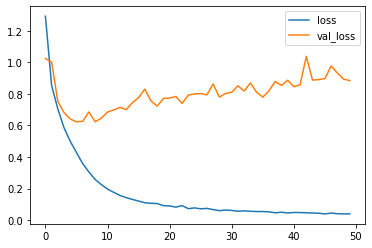

In [0]:
#Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

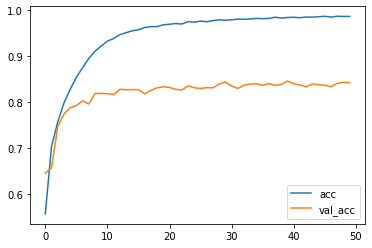

In [0]:
#Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Confusion matrix, without normalization
[[884   7  33   7   8   3   9   5  26  18]
 [  7 962   0   1   1   0   2   0   3  24]
 [ 19   0 874  19  30  14  30  10   3   1]
 [  8   3  48 726  38  97  54  11   6   9]
 [  4   1  35  16 878  14  32  18   2   0]
 [  2   2  22  88  33 815  20  16   1   1]
 [  4   0  23  17   8   7 940   0   1   0]
 [  7   0  15  14  28  21   4 908   2   1]
 [ 20   9  10   7   1   5   3   2 933  10]
 [ 15  34   5   3   1   1   4   3  11 923]]


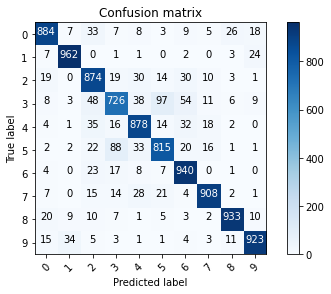

In [0]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))


In [0]:
#label mapping
labels='''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

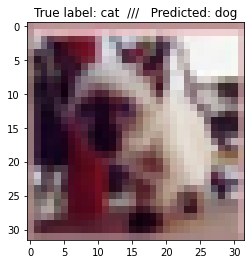

In [0]:
#SHow me misclassified examples
# TODO: add label names
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title('True label: %s  ///   Predicted: %s' % (labels[y_test[i]], labels[p_test[i]]));

In [0]:
#Now that model is so large, it's useful to summarize it
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496 

In [0]:
#Fit with data augmentation
#Note: If you run this AFTER calling the previous model.fit(), it will CONTINUE training where it left off
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=True)
train_generator = data_generator.flow(x_train,y_train,batch_size)
steps_per_epoch = x_train.shape[0] // batch_size


In [0]:
r = model.fit(train_generator, validation_data=(x_test,y_test), steps_per_epoch= steps_per_epoch, epochs=50)

Epoch 1/50
1562/1562 [==============================] - 28s 18ms/step - loss: 0.5510 - accuracy: 0.8260 - val_loss: 0.5294 - val_accuracy: 0.8312
Epoch 2/50
1562/1562 [==============================] - 28s 18ms/step - loss: 0.4306 - accuracy: 0.8570 - val_loss: 0.5205 - val_accuracy: 0.8328
Epoch 3/50
1562/1562 [==============================] - 28s 18ms/step - loss: 0.4011 - accuracy: 0.8661 - val_loss: 0.4766 - val_accuracy: 0.8478
Epoch 4/50
1562/1562 [==============================] - 28s 18ms/step - loss: 0.3827 - accuracy: 0.8728 - val_loss: 0.4688 - val_accuracy: 0.8520
Epoch 5/50
1562/1562 [==============================] - 28s 18ms/step - loss: 0.3664 - accuracy: 0.8773 - val_loss: 0.4579 - val_accuracy: 0.8526
Epoch 6/50
1562/1562 [==============================] - 28s 18ms/step - loss: 0.3478 - accuracy: 0.8836 - val_loss: 0.4431 - val_accuracy: 0.8531
Epoch 7/50
1562/1562 [==============================] - 29s 18ms/step - loss: 0.3352 - accuracy: 0.8889 - val_loss: 0.4643 -

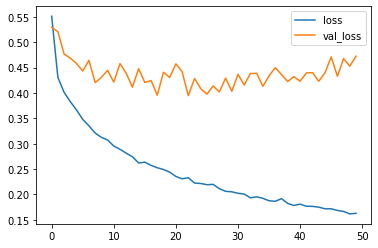

In [0]:
#Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

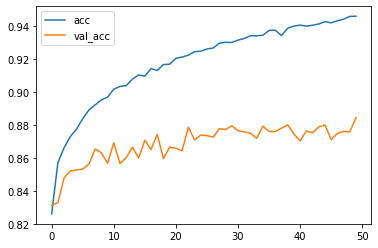

In [0]:
#Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Confusion matrix, without normalization
[[884   7  33   7   8   3   9   5  26  18]
 [  7 962   0   1   1   0   2   0   3  24]
 [ 19   0 874  19  30  14  30  10   3   1]
 [  8   3  48 726  38  97  54  11   6   9]
 [  4   1  35  16 878  14  32  18   2   0]
 [  2   2  22  88  33 815  20  16   1   1]
 [  4   0  23  17   8   7 940   0   1   0]
 [  7   0  15  14  28  21   4 908   2   1]
 [ 20   9  10   7   1   5   3   2 933  10]
 [ 15  34   5   3   1   1   4   3  11 923]]


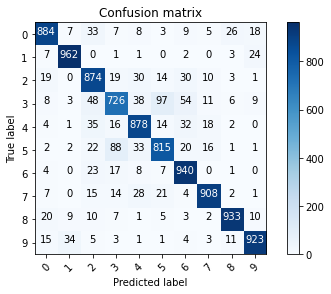

In [0]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))


In [0]:
#label mapping
labels='''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


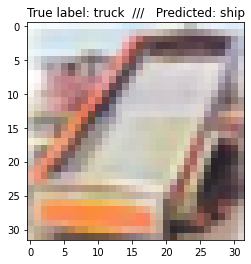

In [0]:
#SHow me misclassified examples
# TODO: add label names
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title('True label: %s  ///   Predicted: %s' % (labels[y_test[i]], labels[p_test[i]]));

In [0]:
#Now that model is so large, it's useful to summarize it
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496 